In [79]:
import pymc as pm
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
% matplotlib inline

In [51]:
p_true = 0.05
n = 1500
p = pm.Uniform('p', lower=0, upper=1)


In [52]:
occurrences = pm.rbernoulli(p_true, n)
print occurrences.sum()
print occurrences.mean()

77
0.0513333333333


In [53]:
obs = pm.Bernoulli('obs', p, value=occurrences, observed=True)

In [54]:
mcmc = pm.MCMC([p, obs])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.1 sec

### Lying predict

In [55]:
n = 100
p = pm.Uniform('freq_cheating', 0, 1)  # 真实作弊者比例，假设它来自均匀分布

In [56]:
true_answers = pm.Bernoulli('truths', p, size=n)  # 每个回答情况

In [57]:
first_coin_flips = pm.Bernoulli('first_flips', 0.5, size=n)
second_coin_flips = pm.Bernoulli('second_flips', 0.5, size=n)

In [100]:
@pm.deterministic
def observed_proportion(t_a=true_answers, fc=first_coin_flips, sc=second_coin_flips):
    observed = fc * t_a + (1 - fc) * sc
    return observed.sum() / float(n)
print observed_proportion.value

0.38


In [99]:
observed_proportion = pm.Lambda('observed_proportion',
    lambda t_a=true_answers, fc=first_coin_flips, sc=second_coin_flips: 
    sum(fc * t_a + (1 - fc) * sc) / n)
print observed_proportion.value

0


In [101]:
x = 35  # 收到的学生回答“是的”结果
# 观测结果，意思是“是的”的个数的概率
observations = pm.Binomial('obs', n, observed_proportion, value=x, observed=True)

In [102]:
observations.logp

-2.6771547811236474

In [81]:
model = pm.Model([p, true_answers, observed_proportion, first_coin_flips, second_coin_flips, 
                   observations])
mcmc = pm.MCMC(model)
mcmc.sample(40000, 12000)

 [-----------------100%-----------------] 40000 of 40000 complete in 11.6 sec

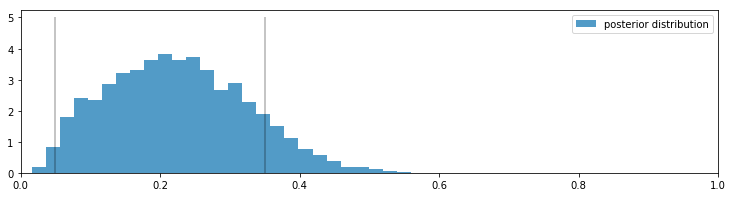

In [82]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)
plt.xlim(0, 1)
plt.legend();

In [103]:
import pyspark

ImportError: No module named pyspark